In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Sierra/diabetes_indicators.csv")

In [3]:
print(df.shape)
df.head(10)

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
binary_features = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'Sex']
num_features = ['BMI', 'PhysHlth']
cat_features = ['GenHlth', 'Age']

In [5]:
df_num = df.loc[:, num_features]
df_num.describe()

,BMI,PhysHlth
count,253680.000000,253680.000000
mean,28.382364,4.242081
std,6.608694,8.717951
min,12.000000,0.000000
25%,24.000000,0.000000
50%,27.000000,0.000000
75%,31.000000,3.000000
max,98.000000,30.000000


In [6]:
#Scaler
#initialize
scaler = StandardScaler()

#fit
scaler.fit(df_num)

#predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num_features)

df_scaled.head()

,BMI,PhysHlth
0,1.757936,1.233999
1,-0.511806,-0.486592
2,-0.057858,2.954590
3,-0.209174,-0.486592
4,-0.663122,-0.486592


In [7]:
df_cat = df.loc[:, cat_features]
df_cat.head()

,GenHlth,Age
0,5.0,9.0
1,3.0,7.0
2,5.0,9.0
3,2.0,11.0
4,2.0,11.0


In [8]:
#put everything together:
df_clean = df.loc[:, binary_features]
df_clean = pd.concat([df_clean, df_scaled], axis=1)
df_clean = pd.concat([df_clean, df_cat], axis=1)
df_clean.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,DiffWalk,Sex,BMI,PhysHlth,GenHlth,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.757936,1.233999,5.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511806,-0.486592,3.0,7.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.057858,2.954590,5.0,9.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.209174,-0.486592,2.0,11.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.663122,-0.486592,2.0,11.0


In [9]:
df_clean['Diabetes_012'] = df_clean['Diabetes_012'].replace(2.0, 1.0)

df_final = df_clean.iloc[:, [0] + list(range(1, df_clean.shape[1]))]

df_final.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,DiffWalk,Sex,BMI,PhysHlth,GenHlth,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.757936,1.233999,5.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511806,-0.486592,3.0,7.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.057858,2.954590,5.0,9.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.209174,-0.486592,2.0,11.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.663122,-0.486592,2.0,11.0


In [10]:
corrs = df_final.corr()
corrs

,Diabetes_012,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,DiffWalk,Sex,BMI,PhysHlth,GenHlth,Age
Diabetes_012,1.000000,0.270334,0.210290,0.067879,0.104800,0.176933,-0.056682,0.222155,0.029606,0.223851,0.174948,0.300785,0.185891
HighBP,0.270334,1.000000,0.298199,0.098508,0.129575,0.209361,-0.003972,0.223618,0.052207,0.213748,0.161212,0.300530,0.344452
HighChol,0.210290,0.298199,1.000000,0.085642,0.092620,0.180765,-0.011543,0.144672,0.031205,0.106722,0.121751,0.208426,0.272318
CholCheck,0.067879,0.098508,0.085642,1.000000,0.024158,0.044206,-0.023730,0.040585,-0.022115,0.034495,0.031775,0.046589,0.090321
Stroke,0.104800,0.129575,0.092620,0.024158,1.000000,0.203002,-0.016950,0.176567,0.002978,0.020153,0.148944,0.177942,0.126974
HeartDiseaseorAttack,0.176933,0.209361,0.180765,0.044206,0.203002,1.000000,-0.028991,0.212709,0.086096,0.052904,0.181698,0.258383,0.221618
HvyAlcoholConsump,-0.056682,-0.003972,-0.011543,-0.023730,-0.016950,-0.028991,1.000000,-0.037668,0.005740,-0.048736,-0.026415,-0.036724,-0.034578
DiffWalk,0.222155,0.223618,0.144672,0.040585,0.176567,0.212709,-0.037668,1.000000,-0.070299,0.197078,0.478417,0.456920,0.204450
Sex,0.029606,0.052207,0.031205,-0.022115,0.002978,0.086096,0.005740,-0.070299,1.000000,0.042950,-0.043137,-0.006091,-0.027340
BMI,0.223851,0.213748,0.106722,0.034495,0.020153,0.052904,-0.048736,0.197078,0.042950,1.000000,0.121141,0.239185,-0.036618


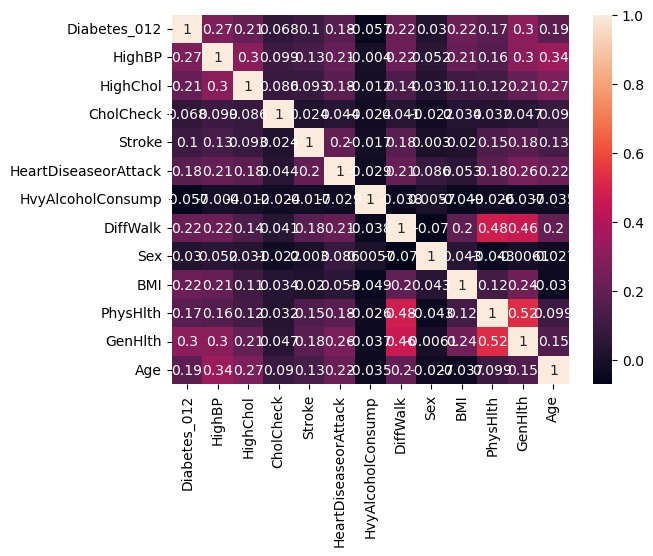

In [11]:
sns.heatmap(corrs, annot=True)
plt.show()

In [12]:
corrs.Diabetes_012.sort_values(ascending=False)

Diabetes_012            1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Stroke                  0.104800
CholCheck               0.067879
Sex                     0.029606
HvyAlcoholConsump      -0.056682
Name: Diabetes_012, dtype: float64

In [13]:
df_final.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,DiffWalk,Sex,BMI,PhysHlth,GenHlth,Age
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.757936,1.233999,5.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511806,-0.486592,3.0,7.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.057858,2.954590,5.0,9.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.209174,-0.486592,2.0,11.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.663122,-0.486592,2.0,11.0


In [14]:
#check for imbalabce
df_final.Diabetes_012.value_counts()

Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64

In [15]:
df_final.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'BMI',
       'PhysHlth', 'GenHlth', 'Age'],
      dtype='object')

In [16]:
features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'DiffWalk', 'Sex', 'BMI',
       'PhysHlth', 'GenHlth', 'Age']

In [17]:
df_sub = df_final.loc[:, features]

In [18]:
df_sub.head()

,HighBP,HighChol,CholCheck,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,DiffWalk,Sex,BMI,PhysHlth,GenHlth,Age
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.757936,1.233999,5.0,9.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.511806,-0.486592,3.0,7.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.057858,2.954590,5.0,9.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.209174,-0.486592,2.0,11.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.663122,-0.486592,2.0,11.0


In [19]:
#Step 1: get data

X = df_sub
y = df_final.Diabetes_012

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # stratify=True maintains target class percentages

In [20]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[166304   4658]
 [ 26281   5701]]
    
    AUC: 0.8148835683776046

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.86      0.97      0.91    170962
         1.0       0.55      0.18      0.27     31982

    accuracy                           0.85    202944
   macro avg       0.71      0.58      0.59    202944
weighted avg       0.81      0.85      0.81    202944

    
TEST METRICS
    Confusion Matrix: 
    [[41580  1161]
 [ 6536  1459]]
    
    AUC: 0.818432906062651

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     42741
         1.0       0.56      0.18      0.27      7995

    accuracy                           0.85     50736
   macro avg       0.71      0.58      0.60     50736
weighted avg       0.82      0.85      0.81     50736

    


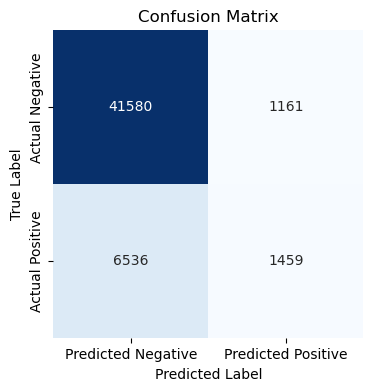

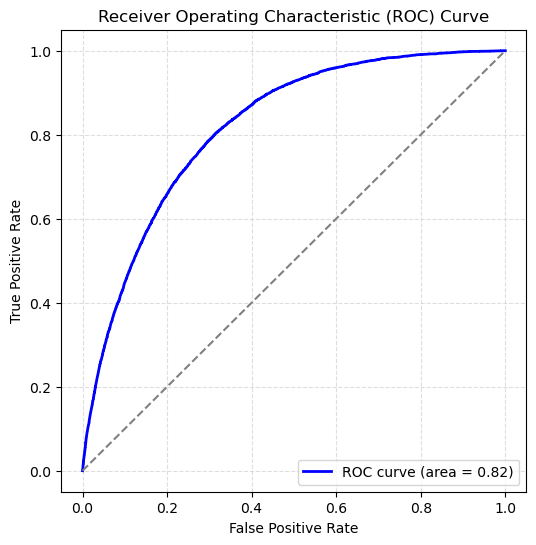

In [21]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[169638   1324]
 [ 13977  18005]]
    
    AUC: 0.9610705107640701

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.92      0.99      0.96    170962
         1.0       0.93      0.56      0.70     31982

    accuracy                           0.92    202944
   macro avg       0.93      0.78      0.83    202944
weighted avg       0.93      0.92      0.92    202944

    
TEST METRICS
    Confusion Matrix: 
    [[39489  3252]
 [ 5916  2079]]
    
    AUC: 0.6316318680785655

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     42741
         1.0       0.39      0.26      0.31      7995

    accuracy                           0.82     50736
   macro avg       0.63      0.59      0.60     50736
weighted avg       0.79      0.82      0.80     50736

    


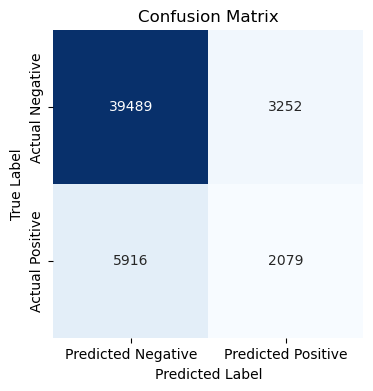

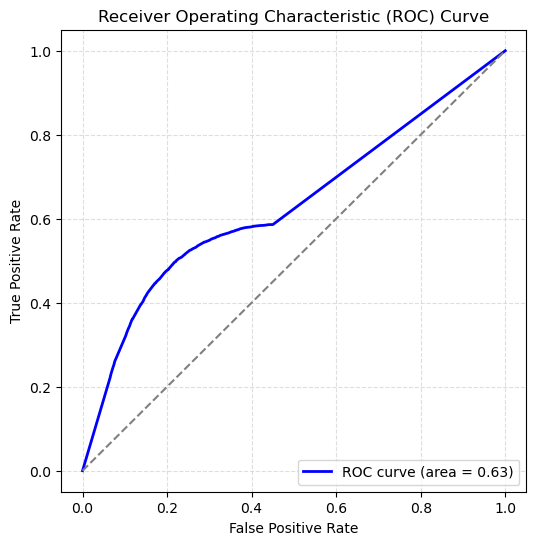

In [22]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

In [24]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

KeyboardInterrupt: 

In [ ]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

In [26]:
from xgboost import XGBClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[166863   4099]
 [ 25034   6948]]
    
    AUC: 0.837503813600693

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    170962
         1.0       0.63      0.22      0.32     31982

    accuracy                           0.86    202944
   macro avg       0.75      0.60      0.62    202944
weighted avg       0.83      0.86      0.83    202944

    
TEST METRICS
    Confusion Matrix: 
    [[41572  1169]
 [ 6402  1593]]
    
    AUC: 0.8223436891921656

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42741
         1.0       0.58      0.20      0.30      7995

    accuracy                           0.85     50736
   macro avg       0.72      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736

    


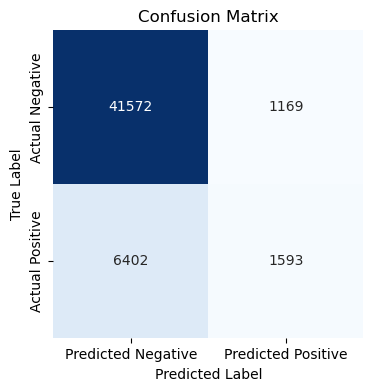

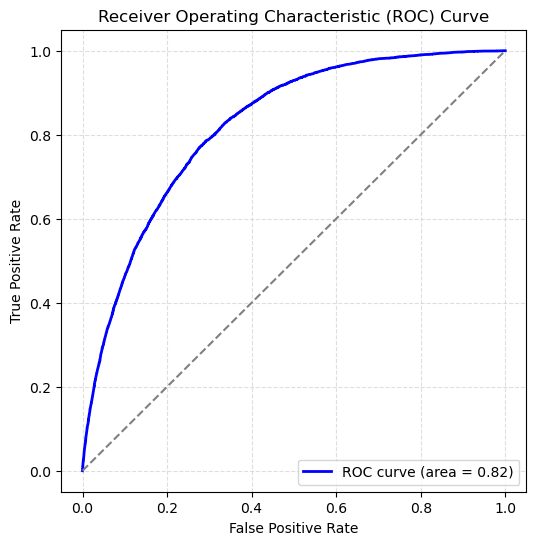

In [27]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [28]:
# Models are very similar and all show signs of overfitting, however we will choose xgboost as out model

In [29]:
#choose model
#model productionalization

# Step 3:retrain model on full dataset
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [30]:
import pickle

In [33]:
from sklearn.utils.validation import check_is_fitted

In [36]:
check_is_fitted(scaler)

None


In [37]:
#save models

pickle.dump(scaler, open("diabetes_scaler.h5", 'wb'))

pickle.dump(xgb, open("diabetes_model.h5", 'wb'))

In [ ]:
#df_test = pd.read_csv("test.csv")
#df_test.head()

In [ ]:
xgb.predict(df)

In [ ]:
df.info()

In [ ]:
#imputation
#df['Diabetes_012'] = df['Diabetes_012'].replace(2.0, 1.0)

#drop columns
#cols_to_drop = ["Smoker", "PhysActivity", "Fruits", "Veggies", "AnyHealthcare", "NoDocbcCost", "MentHlth", "Education", "Income"]
#df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
scaler = pickle.load(open("diabetes_scaler.h5", 'wb'))
scaled_data = scaler.transform(df.loc[:, ["BMI", "PhysHlth"]])
df_scaled2 = pd.DataFrame(scaled_data, columns=["BMI", "PhysHlth"])

#replace
df["BMI"] = df_scaled2.BMI
df["PhysHlth"] = df_scaled2.PhysHlth

df.head()

In [ ]:
#load in model
model = pickle.load(open("diabetes_model.h5", 'wb'))

preds = model.predict(dt)
preds